In [1]:
import pandas as pd
data= pd.read_csv('D:/Infosys Springboard/Internship 5.0 Python Tech Stack/Cyber Bullying Detection Project/labelled_comments2031.csv')

In [3]:
data.head()

,label,preprocessed_comments
0,0,unsteady biden subdued trump debate analyzed
1,0,trump president future change mean bad
2,0,joe biden pls win
3,1,economy tank thanks biden harris
4,0,trump win


In [5]:
from sklearn.model_selection import train_test_split

X=data['preprocessed_comments']
y=data['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print("Training set size:",X_train.shape)
print("Testing set size:",X_test.shape)

Training set size: (1421,)
Testing set size: (610,)


In [7]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)

In [15]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)

In [19]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train_vectorized, y_train)
y_pred = model.predict(X_test_vectorized)

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Confusion Matrix:
[[199  75]
 [102 234]]
Accuracy: 0.71


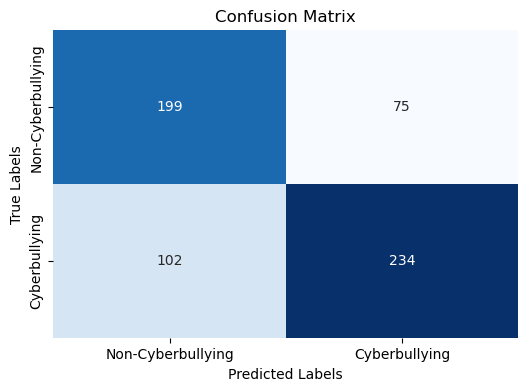

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Non-Cyberbullying', 'Cyberbullying'],
            yticklabels=['Non-Cyberbullying', 'Cyberbullying'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [29]:
#Saving model
import pickle
filename='classification_model_final'
pickle.dump(model,open(filename,'wb'))

In [31]:
#Saving Vectorized data
import pickle
filename='vectorized_data_final'
pickle.dump(vectorizer,open(filename,'wb'))